In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib as plt

In [9]:
dfs = []
for path in glob.glob('E2E-DATASET/**/**/results.csv'):
    dfs.append(pd.read_csv(path, index_col=0))
# for path in glob.glob('DEFECTS4J/results/**/**/**/results.csv'):
#     dfs.append(pd.read_csv(path, index_col=0))
df = pd.concat(dfs, sort=False)

In [6]:
dfg = df.groupby(['name'])

In [7]:
# Get Median of times and Mean of avgCpu and maxMem
pd.concat([dfg.median()[['time']],dfg.mean()[['avgCpu', 'maxMem']]], axis=1, join='inner')

time      avgCpu       maxMem
app      name                                                 
WebApp-1 checkCreateList     184.6105  129.081902  2555.792188
WebApp-2 checkCreateCourse   172.2360  132.954168  2792.770312
         checkDownload       170.4860  132.866299  2823.666797
         checkShowProfile    152.9335   66.955583  2681.415625
WebApp-3 checkShowAdminPage  210.0100  142.915301  2398.943750

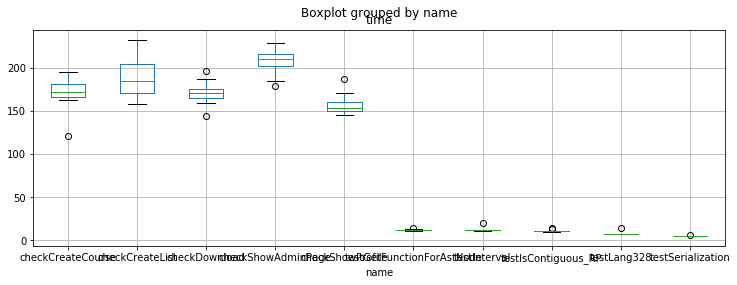

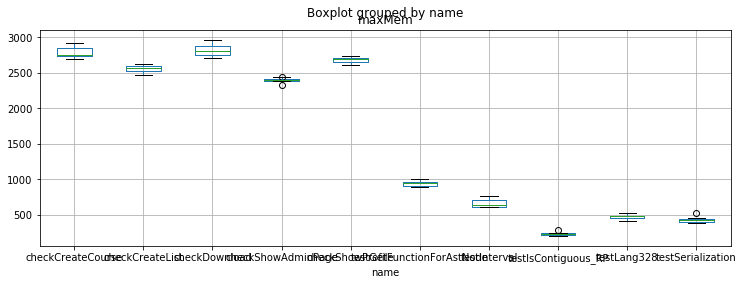

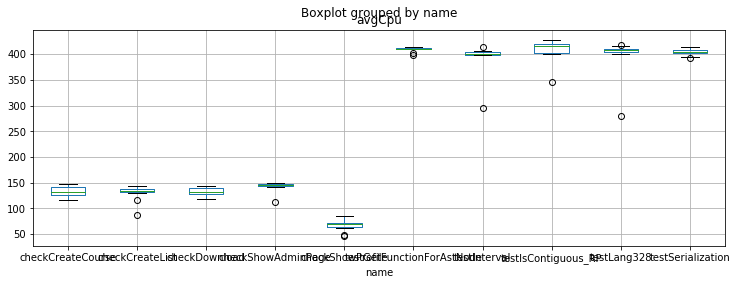

In [43]:
boxplot = df.boxplot(column=['time'], by='name', figsize=(12,4))
boxplot
boxplot2 = df.boxplot(column=['maxMem'], by='name', figsize=(12,4))
boxplot2
boxplot3 = df.boxplot(column=['avgCpu'], by='name', figsize=(12,4))
boxplot3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
plt.savefig('boxcompare.png')